In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/E-Commerce-Dataset.csv"
df = pd.read_csv(url)
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [97]:
print(f"Dublikatlar soni: {df.duplicated().sum()}")

Dublikatlar soni: 0


In [98]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [99]:
df.shape

(5630, 20)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [101]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [102]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
0,83.161634
1,16.838366


In [103]:
churn_rate = df['Churn'].value_counts()/len(df)*100

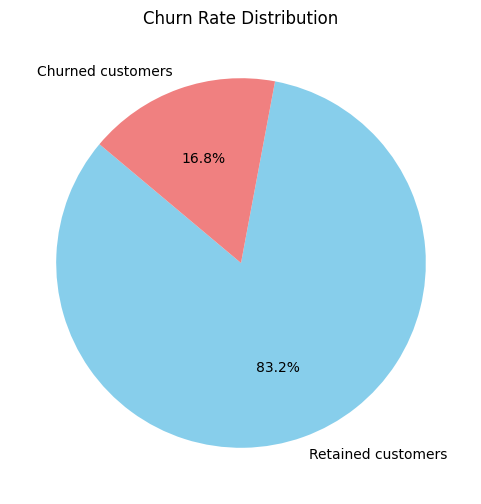

In [104]:
plt.figure(figsize=(6, 6))
plt.pie(churn_rate,
        labels=['Retained customers', 'Churned customers'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['skyblue', 'lightcoral'])

plt.title('Churn Rate Distribution')
plt.show()

In [105]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


## in data set ,there are many nan values , that's why i filled  missing values


In [106]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [107]:
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df.groupby('CityTier')['WarehouseToHome'].transform('median'))

In [108]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [109]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.337831
Complain,0.250188
DaySinceLastOrder,0.155871
CashbackAmount,0.154161
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.067309
NumberOfAddress,0.043931


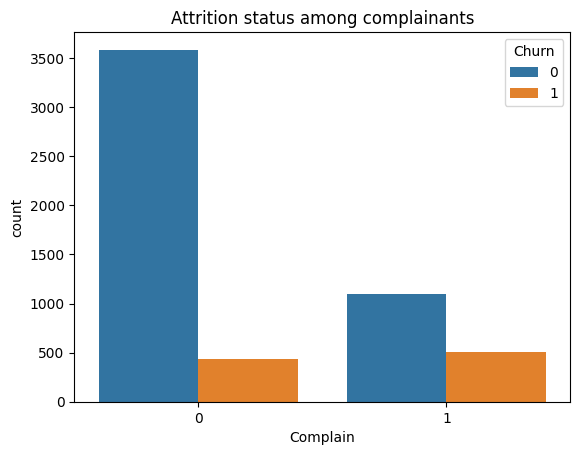

In [110]:
sns.countplot(data=df, x='Complain', hue='Churn')
plt.title("Attrition status among complainants")
plt.show()

About half of those who complain are churned. It is necessary to find out why they are complaining and we correlate the complaint with other columns.


In [111]:
df.corrwith(df['Complain'], numeric_only=True).abs().sort_values(ascending=False)

,0
Complain,1.000000
Churn,0.250188
DaySinceLastOrder,0.041415
SatisfactionScore,0.031115
NumberOfAddress,0.026399
WarehouseToHome,0.026181
Tenure,0.020535
OrderCount,0.019307
CustomerID,0.009944
CouponUsed,0.008174


the complain column is only weakly related to churn, and almost 0 with the other column,the complaint is about something else


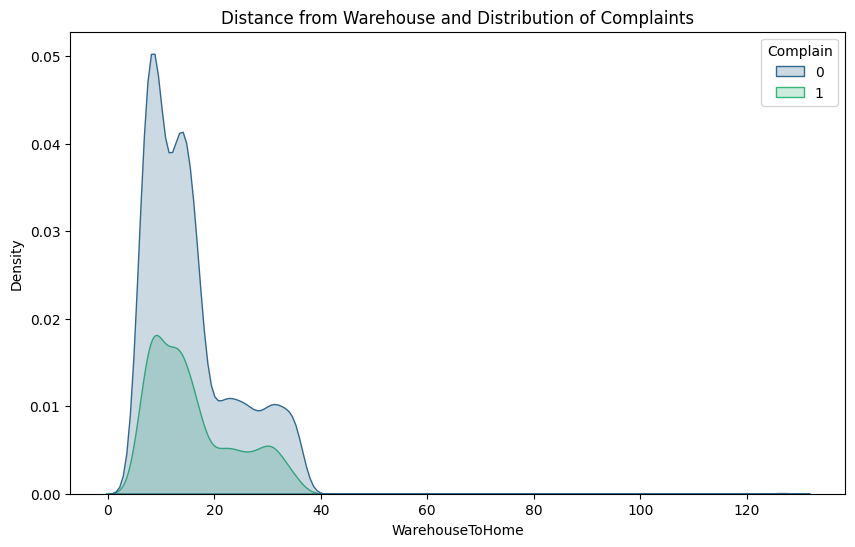

In [112]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='WarehouseToHome', hue='Complain', fill=True, palette='viridis')
plt.title('Distance from Warehouse and Distribution of Complaints')
plt.show()

As a result of this analysis, the complaint is not remote, but in the processes inside the warehouse,maybe the quality of the product is not good

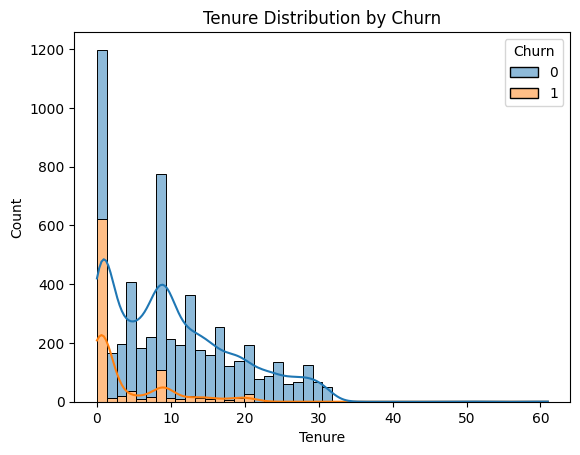

In [113]:
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, multiple="stack")
plt.title('Tenure Distribution by Churn')
plt.show()

many new customers are leaving  quickly approximately between 0-5 tenure. As the tenure increases, customers are staying.The blue line between 8-10 tenures is very high, we should pay attention to this process. There may have been stocks at that time



In [114]:
df.corrwith(df['Tenure'], numeric_only=True).abs().sort_values(ascending=False)

,0
Tenure,1.000000
CashbackAmount,0.468178
Churn,0.337831
NumberOfAddress,0.235076
OrderCount,0.186917
DaySinceLastOrder,0.174378
CouponUsed,0.129724
CityTier,0.057895
CustomerID,0.035096
NumberOfDeviceRegistered,0.020657


In [115]:
df = df[df['CashbackAmount'] > 100]
df = df[df['Tenure']<40]

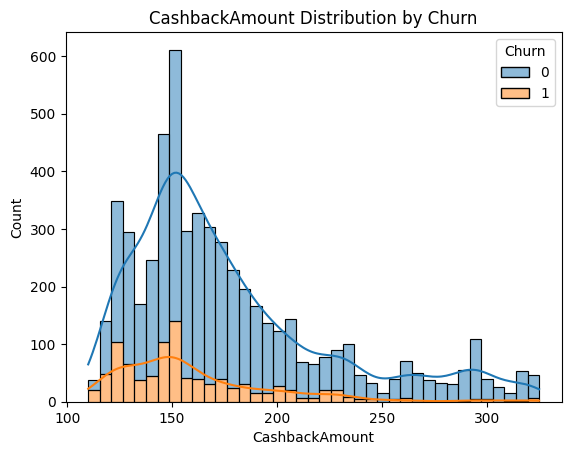

In [116]:
sns.histplot(data=df, x='CashbackAmount', hue='Churn', kde=True, multiple="stack")
plt.title('CashbackAmount Distribution by Churn')
plt.show()

In [117]:
df = df[df['NumberOfAddress'] < 11]

In [118]:
df.corrwith(df['DaySinceLastOrder'], numeric_only=True).abs().sort_values(ascending=False)

,0
DaySinceLastOrder,1.000000
OrderCount,0.445521
CashbackAmount,0.325735
CouponUsed,0.320171
Tenure,0.172360
Churn,0.153115
CustomerID,0.101321
NumberOfAddress,0.071183
HourSpendOnApp,0.068933
Complain,0.039081


/tmp/ipython-input-3216515762.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  ax = sns.countplot(data=df, x='DaySinceLastOrder', color='red', hue='Churn')


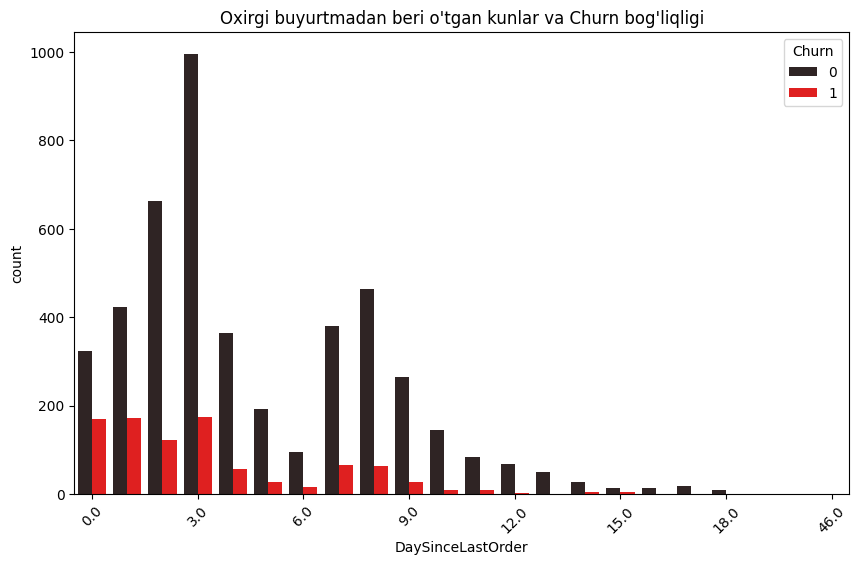

In [119]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='DaySinceLastOrder', color='red', hue='Churn')

ticks = ax.get_xticks()

plt.xticks(ticks[::3], rotation=45)

plt.title('Oxirgi buyurtmadan beri o\'tgan kunlar va Churn bog\'liqligi')
plt.show()

many customers have churned until third day, it increased  between 7 and 8 .



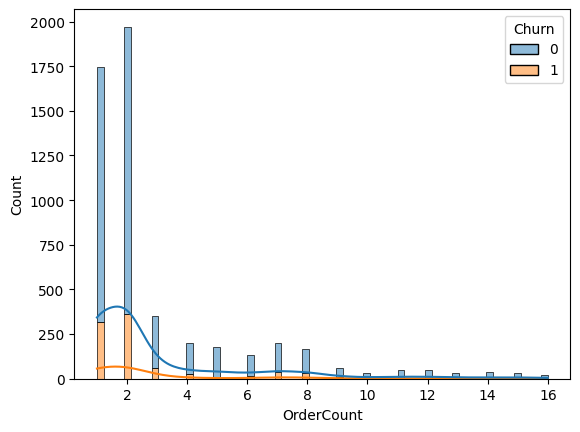

In [120]:
sns.histplot(data=df, x='OrderCount', hue='Churn', kde=True, multiple="stack")
plt.title
plt.show()

A large number of churned customers placed up to 2 orders.


In [121]:
cols_to_drop = ['CustomerID', 'Gender', 'HourSpendOnApp',
                'NumberOfDeviceRegistered','OrderAmountHikeFromlastYear',
                'CouponUsed','NumberOfAddress','PreferredPaymentMode',
                'PreferedOrderCat','OrderCount',]

In [122]:
new_df = df.drop(columns=cols_to_drop)

In [123]:
new_df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,2,Single,1,5.0,160
1,1,9.0,Phone,1,8.0,3,Single,1,0.0,121
2,1,9.0,Phone,1,30.0,3,Single,1,3.0,120
3,1,0.0,Phone,3,15.0,5,Single,0,3.0,134
4,1,0.0,Phone,1,12.0,5,Single,0,3.0,130


In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [125]:
X = df.drop('Churn', axis=1)
y = df['Churn']

numerical_features = ['Tenure', 'WarehouseToHome', 'SatisfactionScore',
                      'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'Complain']

categorical_features = ['PreferredLoginDevice', 'MaritalStatus']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



print(X_train[:3])



[[-0.25649805  2.41825241 -0.05575678  0.96857052  0.04475411 -0.71915849
  -0.63009646  1.          0.          1.          0.        ]
 [-1.22390603 -0.29847063  0.6672775  -1.25821995 -1.05158798 -0.71915849
  -0.63009646  0.          0.          1.          0.        ]
 [-0.61927604  1.82766044 -1.50182536  0.13352409  0.00338271 -0.71915849
  -0.63009646  0.          0.          0.          1.        ]]


In [126]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [127]:
## DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [128]:
## model evalution
y_predict2 = dt_model.predict(X_test)
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       918
           1       0.79      0.91      0.85       185

    accuracy                           0.95      1103
   macro avg       0.89      0.93      0.91      1103
weighted avg       0.95      0.95      0.95      1103



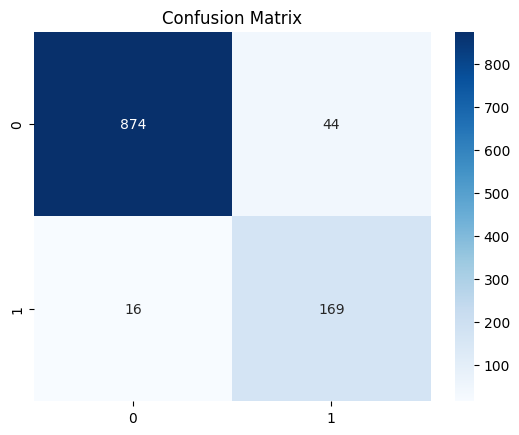

In [129]:
## confusion matrix
conf_matrix  = confusion_matrix(y_test, y_predict2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

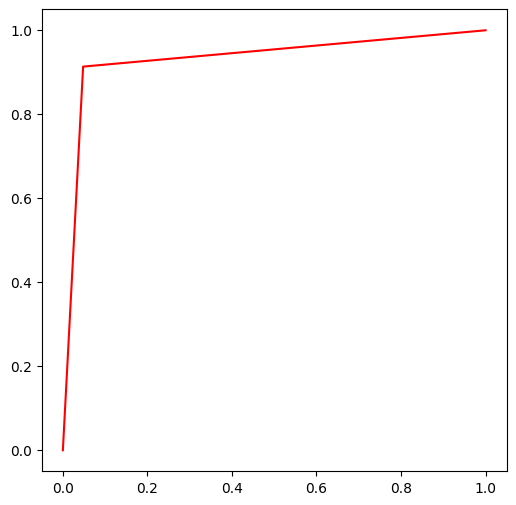

In [130]:
## ROC  curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict2)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='red')
plt.show()

In [131]:
## XGBOOST
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [132]:
y_predict4 = xgb_model.predict(X_test)
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       918
           1       0.88      0.91      0.90       185

    accuracy                           0.97      1103
   macro avg       0.93      0.94      0.94      1103
weighted avg       0.97      0.97      0.97      1103



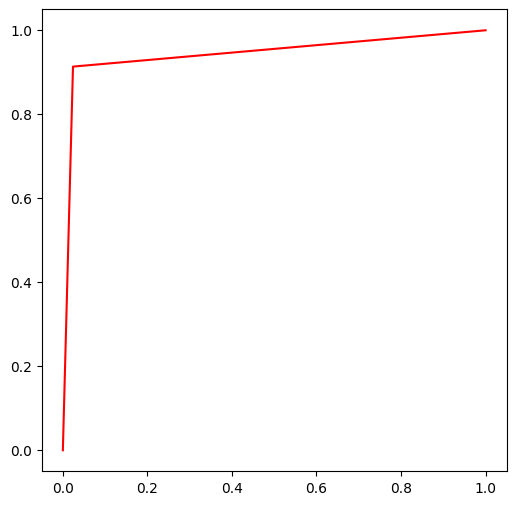

In [133]:
## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict4)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red')
plt.show()


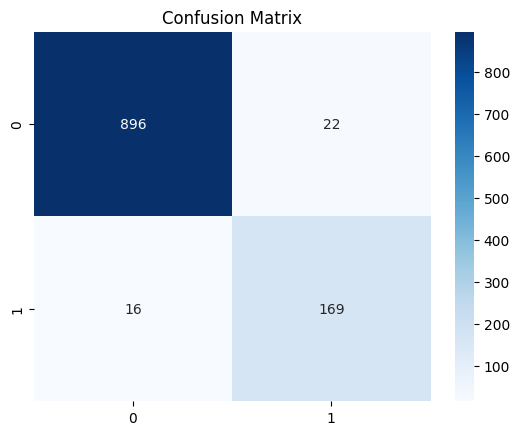

In [134]:
## confusion matrix
conf_matrix  = confusion_matrix(y_test, y_predict4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

 XGBOOST is better than Decision Tree .